## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head(None)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice.
combined_data["Mouse ID"].count()

1893

In [83]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


combined_mice = combined_data[['Mouse ID','Timepoint']]
combined_mice.head(None)

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [80]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicates_mice = combined_mice.duplicated(subset= 'Mouse ID')


0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = combined_data.drop_duplicates(subset=["Mouse ID"], keep='last')
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
# Checking the number of mice in the clean DataFrame.
mice_data["Mouse ID"].count()

249

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_var = combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_std = combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_table = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_var,
    "Standard Deviation": drug_std,
    "SEM": drug_sem,
})
drug_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

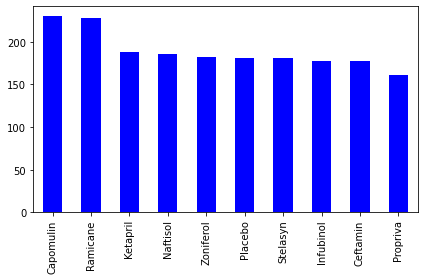

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_names = combined_data["Drug Regimen"].value_counts().index.tolist()
#drug_bars = drug_count.plot(kind="bar", color="b")
combined_data["Drug Regimen"].value_counts().plot(kind="bar", color="b")
plt.tight_layout()
plt.show()


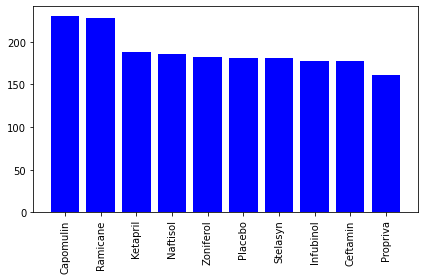

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#drug_names = 

x_axis = np.arange(len(drug_table))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_count, color="b", align="center")
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.tight_layout()
plt.show()


<AxesSubplot:ylabel='Sex'>

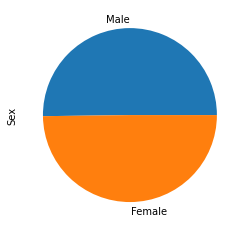

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = mice_data["Sex"].value_counts().plot.pie()
labels = ["Male", "Female"]

mice_sex

Male      125
Female    124
Name: Sex, dtype: int64

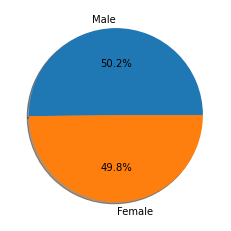

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = mice_data["Sex"].value_counts()


plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=True,)
mice_sex.head()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#print(tumor_data)
tumor_drugs = (tumor_data["Drug Regimen"])
#print(tumor_drugs)
# Start by getting the last (greatest) timepoint for each mouse
mice_data[['Tumor Volume (mm3)']]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Last Timepoint
0,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,20,32.997729,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,45,73.867845,4,Naftisol,Male,9,30,25,63.145652,2,NaN
1889,z969,Naftisol,Male,9,30,45,73.867845,4,Naftisol,Male,9,30,30,65.841013,3,NaN
1890,z969,Naftisol,Male,9,30,45,73.867845,4,Naftisol,Male,9,30,35,69.176246,4,NaN
1891,z969,Naftisol,Male,9,30,45,73.867845,4,Naftisol,Male,9,30,40,70.314904,4,NaN


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
